# ***Bank Customers Churn***



# **Artificial Neural Network Model using Keras and Tensorflow**

About Dataset

A dataset which contain some customers who are withdrawing their account from the bank due to some loss and other issues with the help this data we try to analyse and maintain accuracy.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('Churn Modeling.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
for column in df: # missing values
    print( "column name:", column, "- misisng values ",df[column].isnull().sum())
    print("------------------------------------------------------------------")

column name: RowNumber - misisng values  0
------------------------------------------------------------------
column name: CustomerId - misisng values  0
------------------------------------------------------------------
column name: Surname - misisng values  0
------------------------------------------------------------------
column name: CreditScore - misisng values  0
------------------------------------------------------------------
column name: Geography - misisng values  0
------------------------------------------------------------------
column name: Gender - misisng values  0
------------------------------------------------------------------
column name: Age - misisng values  0
------------------------------------------------------------------
column name: Tenure - misisng values  0
------------------------------------------------------------------
column name: Balance - misisng values  0
------------------------------------------------------------------
column name: NumOfProdu

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
# Copy df to df2
df2 = df.copy()

# Drop the 'Surname' column from df2
df2.drop(columns=['Surname'], inplace=True)

In [8]:
df2

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [9]:
# One-hot encode the 'Geography' and 'Gender' columns
df2_encoded = pd.get_dummies(df2, columns=['Geography', 'Gender'])

# Display DataFrame with encoded columns
print("DataFrame df2 with encoded columns:")
print(df2_encoded)

DataFrame df2 with encoded columns:
      RowNumber  CustomerId  CreditScore  Age  Tenure    Balance  \
0             1    15634602          619   42       2       0.00   
1             2    15647311          608   41       1   83807.86   
2             3    15619304          502   42       8  159660.80   
3             4    15701354          699   39       1       0.00   
4             5    15737888          850   43       2  125510.82   
...         ...         ...          ...  ...     ...        ...   
9995       9996    15606229          771   39       5       0.00   
9996       9997    15569892          516   35      10   57369.61   
9997       9998    15584532          709   36       7       0.00   
9998       9999    15682355          772   42       3   75075.31   
9999      10000    15628319          792   28       4  130142.79   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  \
0                 1          1               1        101348.88       1 

In [ ]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [ ]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
df['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [ ]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

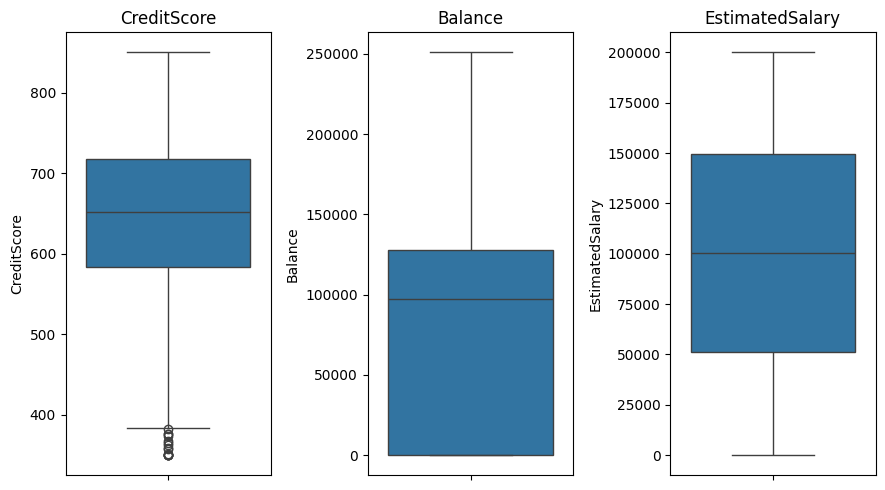

In [ ]:
#Function to create box plots for each column

plt.figure(figsize=(15, 5))

plt.subplot(1, 5, 1)
sns.boxplot(y=df['CreditScore'])
plt.title('CreditScore')

plt.subplot(1, 5, 2)
sns.boxplot(y=df['Balance'])
plt.title('Balance')

plt.subplot(1, 5, 3)
sns.boxplot(y=df['EstimatedSalary'])
plt.title('EstimatedSalary')

plt.tight_layout()
plt.show()

In [10]:
X = df2_encoded.drop(columns=['Exited'],axis=1).values
y = df2_encoded['Exited'].values

In [ ]:
X

array([[1.0000000e+00, 1.5634602e+07, 6.1900000e+02, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [2.0000000e+00, 1.5647311e+07, 6.0800000e+02, ..., 1.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [3.0000000e+00, 1.5619304e+07, 5.0200000e+02, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       ...,
       [9.9980000e+03, 1.5584532e+07, 7.0900000e+02, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [9.9990000e+03, 1.5682355e+07, 7.7200000e+02, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.0000000e+04, 1.5628319e+07, 7.9200000e+02, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00]])

In [ ]:
y

array([1, 0, 1, ..., 1, 1, 0])

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Convert NumPy arrays to TensorFlow tensors
X_train_tf = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train_tf = tf.convert_to_tensor(y_train, dtype=tf.float32)
X_test_tf = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_test_tf = tf.convert_to_tensor(y_test, dtype=tf.float32)

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_tf, y_train_tf, epochs=300, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_tf, y_test_tf)

# Print evaluation metrics
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/300
200/200 [==============================] - 2s 6ms/step - loss: 0.4461 - accuracy: 0.8087 - val_loss: 0.4204 - val_accuracy: 0.8169
Epoch 2/300
200/200 [==============================] - 1s 4ms/step - loss: 0.3899 - accuracy: 0.8366 - val_loss: 0.3853 - val_accuracy: 0.8406
Epoch 3/300
200/200 [==============================] - 1s 4ms/step - loss: 0.3584 - accuracy: 0.8514 - val_loss: 0.3734 - val_accuracy: 0.8394
Epoch 4/300
200/200 [==============================] - 1s 3ms/step - loss: 0.3447 - accuracy: 0.8564 - val_loss: 0.3646 - val_accuracy: 0.8462
Epoch 5/300
200/200 [==============================] - 1s 3ms/step - loss: 0.3378 - accuracy: 0.8608 - val_loss: 0.3615 - val_accuracy: 0.8475
Epoch 6/300
200/200 [==============================] - 1s 3ms/step - loss: 0.3330 - accuracy: 0.8606 - val_loss: 0.3573 - val_accuracy: 0.8531
Epoch 7/300
200/200 [==============================] - 1s 3ms/step - loss: 0.3271 - accuracy: 0.8655 - val_loss: 0.3594 - val_accuracy: 0.8519

Training and Validation Accuracy:

At the end of training (Epoch 300/300), the training accuracy reached 99.64%, while the validation accuracy reached 81.56%.
This indicates that the model achieved very high accuracy on the training data but slightly lower accuracy on the validation data, suggesting some degree of overfitting.

Test Accuracy:

After evaluating the model on the test data, the test accuracy is 80.30%.
The test accuracy is slightly lower than the validation accuracy, which is expected since the model was not directly trained on the test data.

Loss Values:

The training loss (at the end of training) is 0.0141, indicating that the model was able to minimize the loss function significantly during training.
The validation loss is 1.5880, and the test loss is 1.5658. These values are higher compared to the training loss, indicating some degree of discrepancy between the training and validation/test data.
Model Performance:

The model seems to perform well on the training data, achieving very high accuracy. However, there is a noticeable drop in accuracy when evaluated on the validation and test data, indicating potential overfitting.
Further analysis such as tuning hyperparameters, regularization, or using more data could help improve the model's generalization performance.
In summary, while the model achieves high accuracy on the training data, it may not generalize well to unseen data, as evidenced by the lower accuracy on the validation and test sets. Further refinement and tuning of the model are recommended to improve its generalization performance.

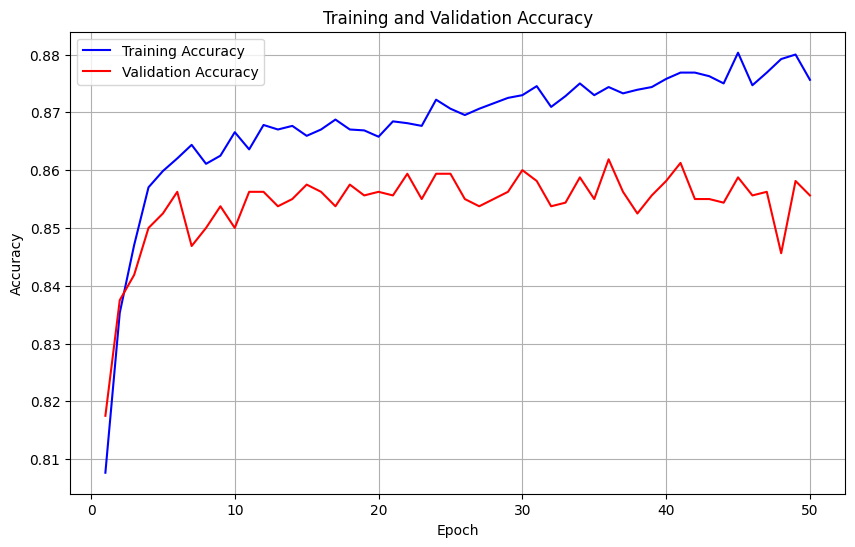

The epoch with maximum validation accuracy is: 36


In [20]:
# Extracting training and validation accuracy history
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Plotting training and validation accuracy
plt.figure(figsize=(10, 6))
epochs = range(1, len(training_accuracy) + 1)
plt.plot(epochs, training_accuracy, label='Training Accuracy', color='blue')
plt.plot(epochs, validation_accuracy, label='Validation Accuracy', color='red')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Find the epoch with maximum validation accuracy
max_val_accuracy_epoch = validation_accuracy.index(max(validation_accuracy)) + 1  # Adding 1 because epochs are 1-indexed

print(f"The epoch with maximum validation accuracy is: {max_val_accuracy_epoch}")


Applying regularization technique to address overfitting and further improve generalization performance.

In [14]:
from tensorflow.keras import regularizers
# Define the model architecture with L2 regularization
model = Sequential([
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

# Print evaluation metrics
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/50
200/200 [==============================] - 1s 4ms/step - loss: 0.5343 - accuracy: 0.8077 - val_loss: 0.4913 - val_accuracy: 0.8175
Epoch 2/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4609 - accuracy: 0.8353 - val_loss: 0.4503 - val_accuracy: 0.8375
Epoch 3/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4210 - accuracy: 0.8470 - val_loss: 0.4273 - val_accuracy: 0.8419
Epoch 4/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3980 - accuracy: 0.8570 - val_loss: 0.4114 - val_accuracy: 0.8500
Epoch 5/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3870 - accuracy: 0.8598 - val_loss: 0.4041 - val_accuracy: 0.8525
Epoch 6/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3782 - accuracy: 0.8620 - val_loss: 0.4021 - val_accuracy: 0.8562
Epoch 7/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3732 - accuracy: 0.8644 - val_loss: 0.3974 - val_accuracy: 0.8469
Epoch 

Training and Validation Accuracy:

At the end of training (Epoch 50/50), the training accuracy reached 87.56%, while the validation accuracy reached 85.56%.
This indicates that the model achieved relatively high accuracy on both the training and validation data, with a slightly higher accuracy on the training data.
Test Accuracy:

After evaluating the model on the test data, the test accuracy is 85.75%.
The test accuracy is slightly higher than the validation accuracy, indicating good generalization performance of the model.
Loss Values:

The training loss (at the end of training) is 0.3221, and the validation loss is 0.3783. These values are relatively close, indicating good convergence and generalization.
The test loss is 0.3627, which is consistent with the validation loss and suggests good performance on unseen data.
Model Performance:

The model demonstrates good performance on both the training and validation data, with a reasonable level of accuracy and convergence of loss values.
The test accuracy is also consistent with the validation accuracy, indicating that the model generalizes well to unseen data.

Overall, the model seems to perform well and generalize effectively to unseen data, as evidenced by the comparable performance on the validation and test sets. This suggests that the model has learned meaningful patterns from the training data and can make accurate predictions on new data.
















63/63 [==============================] - 0s 1ms/step


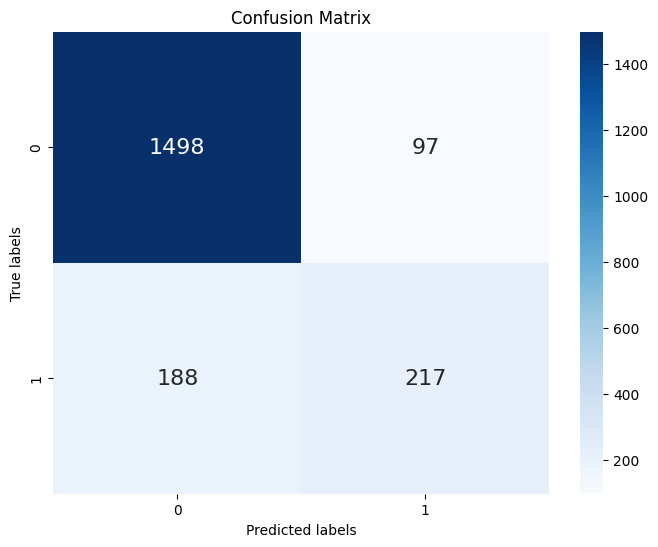

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate predictions
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

**summary:**

217 samples were correctly classified as positive.

97 samples were incorrectly classified as positive when they were actually negative.

188 samples were incorrectly classified as negative when they were actually positive.

1498 samples were correctly classified as negative.

63/63 [==============================] - 0s 3ms/step


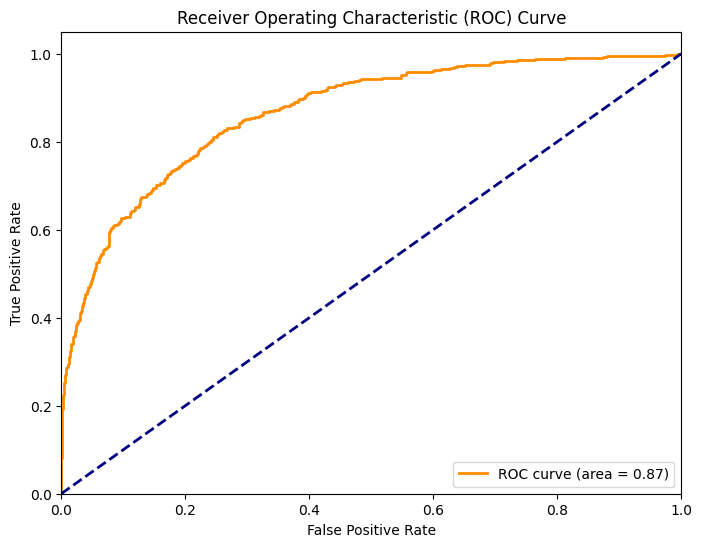

In [17]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have trained your model and obtained predictions
y_pred = model.predict(X_test)  # Assuming ann is your trained model

# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [26]:
from sklearn.metrics import classification_report

# Assuming you have trained your model and obtained predictions
y_pred = model.predict_classes(X_test_tf)  # Assuming model is your trained model

# Generate classification report
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1595
           1       0.69      0.54      0.60       405

    accuracy                           0.86      2000
   macro avg       0.79      0.74      0.76      2000
weighted avg       0.85      0.86      0.85      2000



Precision:

Precision: Precision measures the proportion of true positive predictions among all positive predictions.

For class 0, the precision is 0.89, indicating that 89% of the instances predicted as class 0 are actually class 0.
For class 1, the precision is 0.69, indicating that 69% of the instances predicted as class 1 are actually class 1.
Recall: Recall measures the proportion of true positive predictions among all actual positives.

For class 0, the recall is 0.94, indicating that 94% of the actual class 0 instances were correctly predicted.
For class 1, the recall is 0.54, indicating that 54% of the actual class 1 instances were correctly predicted.
F1-score: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall.

For class 0, the F1-score is 0.91, indicating a good balance between precision and recall for class 0.
For class 1, the F1-score is 0.60, indicating a less balanced performance between precision and recall for class 1.
Support: Support represents the number of actual occurrences of each class in the test data.

There are 1595 instances of class 0 and 405 instances of class 1 in the test data.
Accuracy: Accuracy measures the overall correctness of the model's predictions.

The accuracy is 0.86, indicating that 86% of all predictions are correct.
Macro avg: Macro-averaging calculates the metrics for each class independently and then takes the average.

The macro-averaged precision, recall, and F1-score are 0.79, 0.74, and 0.76, respectively.
Weighted avg: Weighted averaging calculates the metrics for each class independently but takes the class imbalance into account by weighting the average by the support of each class.


